In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/creditcard 2.csv')

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Feature scaling and normalization
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Split the dataset into features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

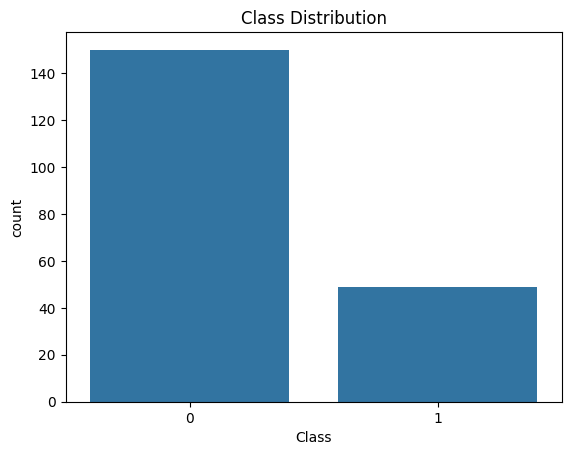

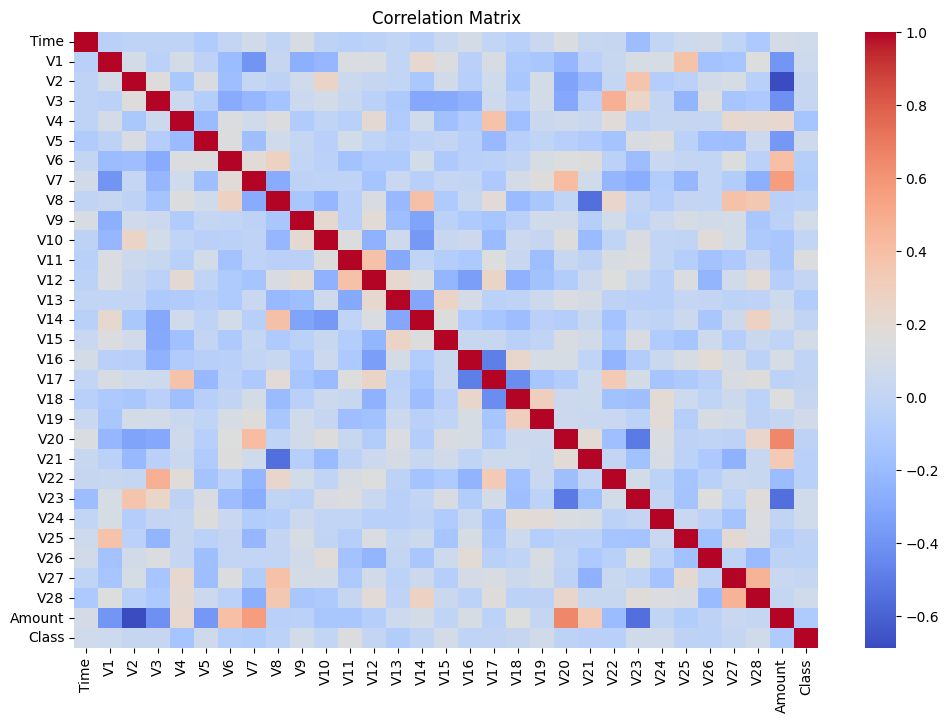

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

# Visualize the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.20      0.14      0.17         7

    accuracy                           0.75        40
   macro avg       0.51      0.51      0.51        40
weighted avg       0.72      0.75      0.73        40

Confusion Matrix
[[29  4]
 [ 6  1]]
Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        33
           1       0.00      0.00      0.00         7

    accuracy                           0.80        40
   macro avg       0.41      0.48      0.44        40
weighted avg       0.68      0.80      0.73        40

Confusion Matrix
[[32  1]
 [ 7  0]]


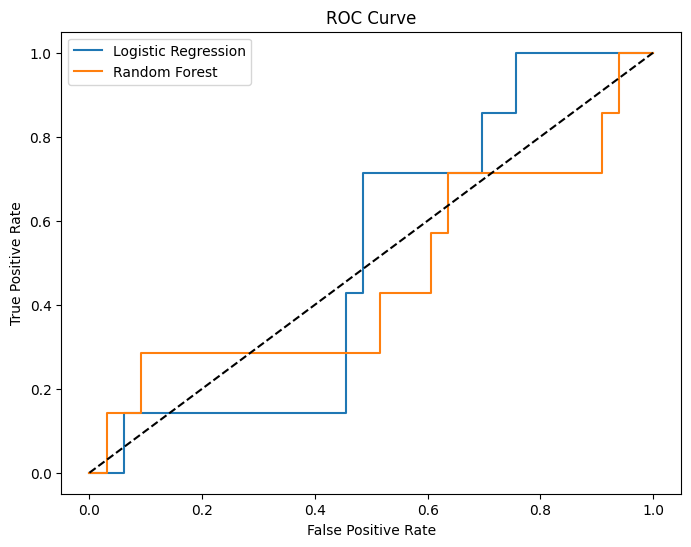

Logistic Regression AUC:  0.5151515151515151
Random Forest AUC:  0.4675324675324675


In [ ]:
# Logistic Regression Evaluation
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_lr))

# Random Forest Classifier Evaluation
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_rf))

# ROC Curve and AUC
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression')
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print('Logistic Regression AUC: ', roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))
print('Random Forest AUC: ', roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))


In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best ROC AUC score: ", grid_search.best_score_)

# Re-evaluate the model with the best parameters
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("Optimized Random Forest Classification Report")
print(classification_report(y_test, y_pred_best_rf))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_best_rf))


Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best ROC AUC score:  0.5879120879120879
Optimized Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.82      0.94      0.87        33
           1       0.00      0.00      0.00         7

    accuracy                           0.78        40
   macro avg       0.41      0.47      0.44        40
weighted avg       0.67      0.78      0.72        40

Confusion Matrix
[[31  2]
 [ 7  0]]
